# Seaborn

 - 教程1:[Seaborn学习（一）------- 构建结构化多绘图网格（FacetGrid(）、map()）详解](https://blog.csdn.net/weixin_42398658/article/details/82960379) 侧重每个参数的详解
 - 教程2:[Seaborn中文教程（五）：通过“多图网格”结构化展示多维数据)](https://www.jianshu.com/p/31426f9e79d4) 侧重图表对比
 - 教程3:[seaborn初探](https://www.jianshu.com/p/388abcc1bc3d) 侧重理解 ***
 - 教程4:[Python 数据可视化概览（涵盖 ggplot 和 Altair）](https://juejin.im/entry/5842eded128fe10058a3cd7a) 侧重比较matplotlib\pandas\seaborn\ggplt\Altair
- 教程4:[Seaborn 数据可视化基础](https://www.shiyanlou.com/courses/892/learning/) 侧重基础

seaborn 同 matplotlib 一样，也是 Python 进行数据可视化分析的重要第三方包。

但 seaborn 是在 matplotlib 的基础上进行了更高级的API封装，使得作图更加容易，图形更加漂亮。

seaborn 可以替代 matplotlib。虽然 seaborn 可以满足大部分情况下的数据分析需求，但是针对一些特殊情况，还是需要用到 matplotlib 的。换句话说，matplotlib更加灵活，可定制化，而seaborn像是更高级的封装，使用方便快捷。

应该把 seaborn 视为 matplotlib 的补充，而不是替代物。


## Seaborn 与 Matplotlib 的区别

** Seaborn 的底层是基于 Matplotlib的**

* 区别类比：点餐时，选套餐还是自己点。
    + Matplotlib 是独立点菜，可能费时费心（尤其是对我这种选择困难症患者...）但最后上桌的菜全是特别适合自己的；
    + Seaborn 是点套餐，特别简单，一切都是配好的，虽然省时省心，但可能套餐里总有些菜是不那么合自己口味的。
* 优缺点
    + Seaborn 优点：用户把自己常用到的可视化绘图过程进行了函数封装，形成的一个“快捷方式”，他相比 Matplotlib 的好处是代码更简洁，可以用一行代码实现一个清晰好看的可视化输出。导入 seaborn 会修改默认的 matplotlib 配色方案和绘图样式，这会提高图表的可读性和美观性。
    + Seaborn 缺点：定制化能力会比较差，只能实现固化的一些可视化模板类型；

    + Matplotlib 优点：可以实现高度定制化绘图的，高度定制化可以让你获得最符合心意的可
    


### 快速优化图形

当我们使用 Matplotlib 绘图时，默认的图像样式算不上美观。此时，就可以使用 Seaborn 完成快速优化。下面，我们先使用 Matplotlib 绘制一张简单的图像。   

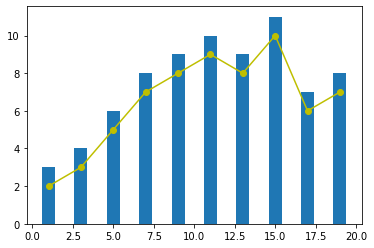

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
y_bar = [3, 4, 6, 8, 9, 10, 9, 11, 7, 8]
y_line = [2, 3, 5, 7, 8, 9, 8, 10, 6, 7]

plt.bar(x, y_bar)
plt.plot(x, y_line, '-o', color='y')

使用 Seaborn 完成图像快速优化的方法非常简单。**只需要将 Seaborn 提供的样式声明代码 sns.set() 放置在绘图前即可。**

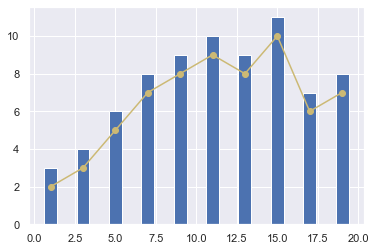

In [21]:
import seaborn as sns

sns.set() # 声明使用 Seaborn 样式

plt.bar(x, y_bar)
plt.plot(x, y_line, '-o', color='y')

我们可以发现，相比于 Matplotlib 默认的纯白色背景，Seaborn 默认的浅灰色网格背景看起来的确要细腻舒适一些。而柱状图的色调、坐标轴的字体大小也都有一些变化。

`sns.set()` 的默认参数为：
```
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
```
其中：
    - context='' 参数控制着默认的画幅大小，分别有 {paper, notebook, talk, poster} 四个值。其中，poster > talk > notebook > paper。
    - style='' 参数控制默认样式，分别有 {darkgrid, whitegrid, dark, white, ticks}，你可以自行更改查看它们之间的不同。
    - palette='' 参数为预设的调色板。分别有 {deep, muted, bright, pastel, dark, colorblind} 等，你可以自行更改查看它们之间的不同。
    - 剩下的 font='' 用于设置字体，font_scale= 设置字体大小，color_codes= 不使用调色板而采用先前的 'r' 等色彩缩写。
 
 
### Seaborn 绘图 API
Seaborn 一共拥有 50 多个 API 类，相比于 Matplotlib 数千个的规模，可以算作是短小精悍了。其中，根据图形的适应场景，Seaborn 的绘图方法大致分类 6 类，分别是：关联图、类别图、分布图、回归图、矩阵图和组合图。而这 6 大类下面又包含不同数量的绘图函数。

接下来，我们就通过实际数据进行演示，使用 Seaborn 绘制不同适应场景的图形。

#### 分布图
分布图主要是用于可视化变量的分布情况，一般分为单变量分布和多变量分布。当然这里的多变量多指二元变量，更多的变量无法绘制出直观的可视化图形。

Seaborn 提供的分布图绘制方法一般有这几个： jointplot，pairplot，distplot，kdeplot。接下来，我们依次来看一下这些绘图方法的使用。

Seaborn 快速查看**单变量分布的方法是 distplot**。默认情况下，该方法将会绘制直方图并拟合核密度估计图。

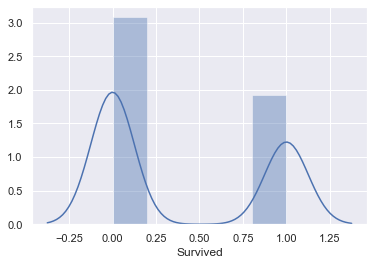

In [23]:
import numpy as np
import pandas as pd

data_train = pd.read_csv('train.csv')
sns.distplot(data_train['Survived'])

distplot 提供了参数来调整直方图和核密度估计图，例如设置 kde(Kernel Density Estimation)=False 则可以只绘制直方图，或者 hist=False 只绘制核密度估计图。当然，kdeplot 可以专门用于绘制核密度估计图，其效果和 distplot(hist=False) 一致，但 kdeplot 拥有更多的自定义设置。

对于大量一维数据的可视化，除了使用直方图(Histogram)，还有一种更好的方法：核密度估计(Kernel Density Estimates，简称KDE)。所谓核密度估计，就是采用平滑的峰值函数(“核”)来拟合观察到的数据点，从而对真实的概率分布曲线进行模拟

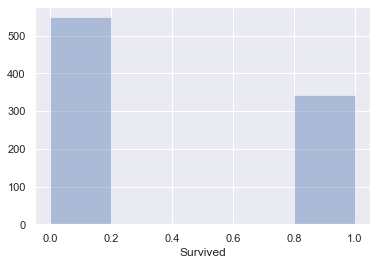

In [24]:
sns.distplot(data_train['Survived'],kde=False)

**jointplot 主要是用于绘制二元变量分布图**。jointplot 并不是一个 Figure-level 接口，但其支持 kind= 参数指定绘制出不同样式的分布图。例如，绘制出核密度估计对比图。

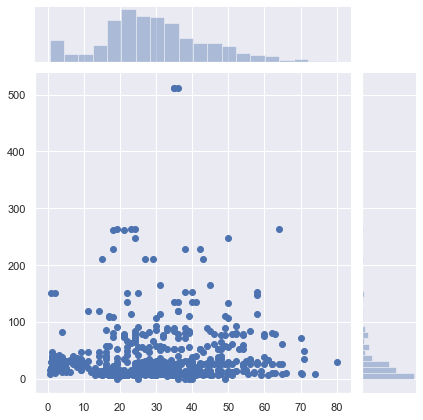

In [31]:
sns.jointplot(x=['Age'],y=['Fare'],data=data_train)

## [Python可视化 | Seaborn5分钟入门(二)——barplot&countplot&pointplot](https://www.jianshu.com/p/8bb06d3fd21b)

### barplot(条形图)
教程1：[seaborn系列 (14) | 条形图barplot()](https://blog.csdn.net/zyb228107/article/details/101938152)

条形图表示数值变量与每个矩形高度的中心趋势的估计值，并使用误差线提供关于该估计值附近的不确定性的一些指示。具体用法如下：

```
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=(function mean), ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
```

关于误差线

- 默认是误差线为均值的标准误差，95% 置信区间

In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars.

The default value for the ci parameter of seaboard.barplot is 95. So, by default, a Seaborn barplot is drawn with 95% confidence intervals.



- x,y,hue:数据字段变量名(如上表，date,name,age,sex为数据字段变量名)
- data: DataFrame,数组或数组列表
- order,hue_order:字符串列表 作用：显式指定分类顺序，eg. order=[字段变量名1，字段变量名2,...]
- estimator:设置每个分类箱的统计函数 (默认为平均值)
- ci:float或者"sd"或None 在估计值附近绘制置信区间的大小，如果是"sd"，则跳过bootstrapping并绘制观察的标准差，如果为None,则不执行bootstrapping,并且不绘制错误条。

ci : float or "sd" or None, optional

Size of confidence intervals to draw around estimated values. If "sd", skip bootstrapping and draw the standard deviation of the observations. If None, no bootstrapping will be performed, and error bars will not be drawn.

- n_boot:int 计算置信区间时使用的引导迭代次数
- orient: v | h 图的显示方向(垂直或水平,即横向或纵向)， 这通常可以从输入变量的dtype推断得到
- color:matplotlib颜色
- palette:调试板名称，列表或字典类型 作用：设置hue指定的变量的不同级别颜色。
- saturation 饱和度：float
- errcolor : matplotlib color 作用：表示置信区间的线条颜色
- errwidth:float 作用：表示误差线的厚度
- capsize:float 作用：表示误差线上"帽"的宽度(误差线上的横线的宽度)
- dodge:bool 作用：使用色调嵌套时，是否应沿分类轴移动元素。

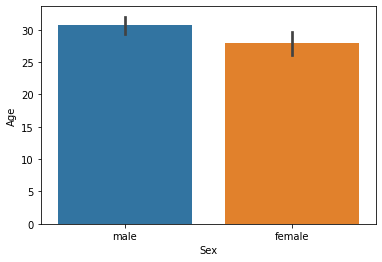

In [2]:
import matplotlib.pyplot as plt #导入 matplotlib.pyplot，并简写成plt
import seaborn as sns
import numpy as np  #导入numpy包，用于生成数组
import pandas as pd #导入pandas包，用于数据分析
#IPython notebook中的魔法方法，这样每次运行后可以直接得到图像，不再需要使用plt.show()
%matplotlib inline  
train_df = pd.read_csv('train.csv')

sns.barplot(x="Sex",y="Age",data=train_df)

指定 x 类别变量进行分组，指定 y 为数据分布，绘制垂直条形图。

关于图像的解释：Seaborn 会对 Sex 列中的类别变量进行分类后，按照 estimator 参数的方法（默认为平均值）计算 Age 的平均值，计算出来的值对应着 Y 值。

误差线：默认为均值的标准误差，95% 置信区间

## [Seaborn5分钟入门(一)——kdeplot和distplot](https://zhuanlan.zhihu.com/p/33977558)

### distplot


displot()集合了matplotlib的hist()与核函数估计kdeplot的功能，增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途。具体用法如下：：

```
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```

先介绍一下直方图(Histograms)：

直方图又称质量分布图，它是表示资料变化情况的一种主要工具。用直方图可以解析出资料的规则性，比较直观地看出产品质量特性的分布状态，对于资料分布状况一目了然，便于判断其总体质量分布情况。直方图表示通过沿数据范围形成分箱，然后绘制条以显示落入每个分箱的观测次数的数据分布。

接下来还是通过具体的例子来体验一下distplot的用法：

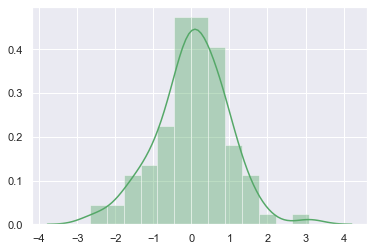

In [33]:
import matplotlib.pyplot as plt
import numpy as np  #导入numpy包，用于生成数组
import seaborn as sns  #习惯上简写成sns
#IPython notebook中的魔法方法，这样每次运行后可以直接得到图像，不再需要使用plt.show()
%matplotlib inline  

sns.set()           #切换到seaborn的默认运行配置

x=np.random.randn(100)  #随机生成100个符合正态分布的数
sns.distplot(x,color="g")

通过hist和kde参数调节是否显示直方图及核密度估计(默认hist,kde均为True)

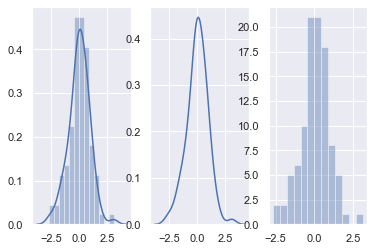

In [34]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(1,3) #创建一个一行三列的画布
sns.distplot(x,ax=axes[0]) #左图
sns.distplot(x,hist=False,ax=axes[1]) #中图
sns.distplot(x,kde=False,ax=axes[2]) #右图

### FacetGrid()
 
当探索具有中等数量（不多不少的意思……）维度的数据集时，一个很好的方式是基于不同的子数据集构建不同的实例，并将它们以网格的方式组织在一张图之中。这种技术有时被称为“lattice”或“trellis”（大概是格子图、网格图），这跟“small multiples”的概念类似（多张更小的子图）。它能帮助我们快速从复杂的数据中提取大量信息。matplotlib对于创建带有多个坐标轴（每个坐标轴体系意味着一张子图）的图形有着良好的支持，seaborn基于这些来直接地将图形的排布结构与数据集的结构联结起来。

要利用这些特性，我们的数据集应该保存在一个pandas DataFrame中，并且应该是Hadley Whickam口中的“tidy data”格式。简短来说，就是我们的dataframe对象中，每一行是一个观测样本，每一列是一个变量。

对于一些更高级的应用来说，我们可以直接使用这篇教程中讨论的一些对象来获得最大的灵活性。一些seaborn函数（如lmplot()/catplot()/pairplot()）也隐式地使用了这些对象。很多seaborn函数是坐标轴级别的，它们仅仅针对某个特定的matplotlib Axes来绘图，而不会修改图形的属性；而在这篇教程中即将讨论到的这些方法是更高级别的函数，在被调用时，它们会创建一个新的图形，而且一般情况下对于创建过程更加严格。在某些案例中，这些函数和他们依赖的类所需要输入的参数依赖于不同的接口属性，比如在lmplot()中我们通过设置高度和宽高比（height和aspect）来控制每个子图（facet）的大小，而非直接指定整个图形的大小。这些函数在调用后都会返回这个图形对象，而且大多数对象都提供了非常方便的方法来改变绘图的方式，这些方法往往更加抽象和简单。

当我们想要基于不同的数据子集来展示某个变量的分布或者多个变量之间的关系时，FacetGrid类会提供很大的帮助。一个FacetGrid图可以从三个维度来构建：row、col和hue。前两个与它返回的坐标轴数组有着之间的关联；我们可以把hue变量理解为第三个维度，就像长、宽和高一样，只不过在这里我们是用不同的颜色来体现它的。

通过使用FacetGrid数据框初始化对象以及将形成网格的行，列或色调维度的变量名称来使用该类。这些变量应该是分类的或离散的，然后变量的每个级别的数据将用于沿该轴的小平面。例如，假设我们想要检查tips数据集中午餐和晚餐之间的差异， 此外，每个的relplot()，catplot()以及lmplot()在内部使用这些对象，并且它们返回的对象时，他们完成，使得其可以用于进一步调整。

基本工作流程是FacetGrid使用数据集和用于构造网格的变量初始化对象。然后，可以通过调用FacetGrid.map()或将一个或多个绘图函数应用于每个子集 FacetGrid.map_dataframe()。最后，可以使用其他方法调整绘图，以执行更改轴标签，使用不同刻度或添加图例等操作

当使用从数据集推断语义映射的seaborn函数时，必须注意在各个方面之间同步这些映射。在大多数情况下，使用图形级别功能（例如relplot()或catplot()）比 FacetGrid直接使用更好

/Users/xusanshan/Anaconda/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


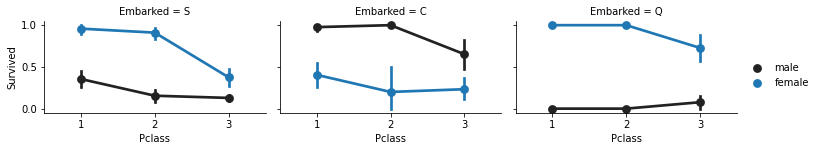

In [9]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train.csv')

grid = sns.FacetGrid(train_df,col='Embarked',height=2.2, aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',order=[1,2,3]).add_legend()


In [16]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train.csv')
print(train_df.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [19]:
print(False+False+True+True+False+True)

3


In [ ]:
Just print out the data of train_df.isnull(), you will see it.



It still got 891 rows, full of Trues and False. 


When you use sum(), it will return the sum of every column, which adds trues(=1) and false(0) together.

When you use count(), it just return number of rows.So you will get 891 for each column no matter you use .isnull().count() or .notnull().count().

```
class seaborn.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)```

- data : DataFrame

    处理后的（“长格式”）dataframe数据，其中每一列都是一个变量（特征），每一行都是一个样本

- row, col, hue : strings 

    定义数据子集的变量，这些变量将在网格的不同方面绘制。请参阅下面*_order参数以控制该变量的级别顺序

    例如：col="sex", hue="smoker",即列表示性别，颜色语意表示是否吸烟，下面示例会给出详细说明

- col_wrap : int, optional

    这个意思是图网格列维度限制，比如col_wrap =3，那么在这个画布里最多只能画3列。行不限制，这样就限制了列的个数。

- share{x,y} : bool, ‘col’, or ‘row’ optional

    是否共享x轴或者y轴，就是说如果为真，就共享同一个轴，否则就不共享，默认是都共享，即都为True
    ```
    g = sns.FacetGrid(tips, col="sex", hue="smoker",sharex=True, sharey=True)# 都共享
    g.map(plt.scatter, "total_bill", "tip", alpha=0.8)
    g.add_legend();
    ```

    ```
    g = sns.FacetGrid(tips, col="sex", hue="smoker",sharex=True, sharey=False)# 关闭共享y轴
    g.map(plt.scatter, "total_bill", "tip", alpha=0.8)
    g.add_legend();
    ```


大家看看右边的y轴是否变化了，一旦不共享，他就会自己标注